In [2]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error



In [4]:
df=pd.read_csv("Fatigue_Life_Data_New.csv")

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Tungsten _W_Ti_Alloy       40 non-null     float64
 1   Stress_Amplitude           40 non-null     int64  
 2   Stress_Ratio               40 non-null     float64
 3   Experimental_Fatigue_Life  40 non-null     int64  
 4   Unnamed: 4                 0 non-null      float64
 5   Unnamed: 5                 0 non-null      float64
 6   Unnamed: 6                 0 non-null      float64
 7   Unnamed: 7                 0 non-null      float64
 8   Unnamed: 8                 0 non-null      float64
 9   Unnamed: 9                 0 non-null      float64
 10  Unnamed: 10                0 non-null      float64
dtypes: float64(9), int64(2)
memory usage: 3.6 KB


In [6]:
df.dropna(axis=1,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Tungsten _W_Ti_Alloy       40 non-null     float64
 1   Stress_Amplitude           40 non-null     int64  
 2   Stress_Ratio               40 non-null     float64
 3   Experimental_Fatigue_Life  40 non-null     int64  
dtypes: float64(2), int64(2)
memory usage: 1.4 KB


In [8]:
df.isnull().sum()

Tungsten _W_Ti_Alloy         0
Stress_Amplitude             0
Stress_Ratio                 0
Experimental_Fatigue_Life    0
dtype: int64

In [9]:
df.duplicated().value_counts()

False    40
Name: count, dtype: int64

In [10]:
X = df[['Stress_Amplitude', 'Stress_Ratio', 'Tungsten _W_Ti_Alloy']]
y = df['Experimental_Fatigue_Life']


In [11]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [12]:
# Train XGBoost Model
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1)
xgb.fit(X_train, y_train)


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [13]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [14]:
joblib.dump(xgb, "xgb_model.pkl")
joblib.dump(rf, "rf_model.pkl")


['rf_model.pkl']

In [19]:
from sklearn.metrics import mean_absolute_error, r2_score

# Predictions on test data
xgb_pred = xgb.predict(X_test)
rf_pred = rf.predict(X_test)

# Calculate Mean Absolute Error (MAE)
xgb_mae = mean_absolute_error(y_test, xgb_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)

# Calculate R-squared (R²)
xgb_r2 = r2_score(y_test, xgb_pred)
rf_r2 = r2_score(y_test, rf_pred)

# Print results
print("XGBoost MAE:", xgb_mae)
print("XGBoost R²:", xgb_r2)
print("Random Forest MAE:", rf_mae)
print("Random Forest R²:", rf_r2)

XGBoost MAE: 6090.9140625
XGBoost R²: 0.9966701865196228
Random Forest MAE: 10595.0
Random Forest R²: 0.9899331878481247


In [20]:
import numpy as np
import joblib

# Load trained XGBoost model
xgb_model = joblib.load("xgb_model.pkl")

# Define input values (Stress Amplitude & Stress Ratio)
stress_amplitudes = np.array([400, 500, 600, 700, 800])
stress_ratios = np.array([0.1, 0.5])
tungsten_alloy = 3.0  # Fixed at 3.0%

# Prepare input data
input_data = np.array([[amp, ratio, tungsten_alloy] for amp in stress_amplitudes for ratio in stress_ratios])

# Predict fatigue life cycles
xgb_preds = xgb_model.predict(input_data)

# Print results
for i, (amp, ratio, pred) in enumerate(zip(input_data[:,0], input_data[:,1], xgb_preds)):
    print(f"Stress Amplitude: {amp}, Stress Ratio: {ratio}, Predicted Fatigue Life: {pred:.0f}")

Stress Amplitude: 400.0, Stress Ratio: 0.1, Predicted Fatigue Life: 439965
Stress Amplitude: 400.0, Stress Ratio: 0.5, Predicted Fatigue Life: 408464
Stress Amplitude: 500.0, Stress Ratio: 0.1, Predicted Fatigue Life: 320049
Stress Amplitude: 500.0, Stress Ratio: 0.5, Predicted Fatigue Life: 264862
Stress Amplitude: 600.0, Stress Ratio: 0.1, Predicted Fatigue Life: 188125
Stress Amplitude: 600.0, Stress Ratio: 0.5, Predicted Fatigue Life: 158672
Stress Amplitude: 700.0, Stress Ratio: 0.1, Predicted Fatigue Life: 115190
Stress Amplitude: 700.0, Stress Ratio: 0.5, Predicted Fatigue Life: 100498
Stress Amplitude: 800.0, Stress Ratio: 0.1, Predicted Fatigue Life: 79294
Stress Amplitude: 800.0, Stress Ratio: 0.5, Predicted Fatigue Life: 67846


In [23]:
import numpy as np
import joblib
import pandas as pd
import matplotlib.pyplot as plt

# Load trained XGBoost model
xgb_model = joblib.load("xgb_model.pkl")

# Define input values
stress_amplitudes = np.array([400, 500, 600, 700, 800])
stress_ratios = np.array([0.1, 0.5])
tungsten_alloy = 3.0  # Fixed at 3.0%

# Prepare input data
input_data = np.array([[amp, ratio, tungsten_alloy] for amp in stress_amplitudes for ratio in stress_ratios])

# Predict fatigue life cycles
xgb_preds = xgb_model.predict(input_data)

# Convert predictions into a DataFrame
results_df = pd.DataFrame(input_data, columns=["Stress Amplitude", "Stress Ratio", "Tungsten Alloy"])
results_df["Predicted Fatigue Life"] = xgb_preds

# Create plot
plt.figure(figsize=(8, 5))
for ratio in stress_ratios:
    subset = results_df[results_df["Stress Ratio"] == ratio]
    plt.plot(subset["Stress Amplitude"], subset["Predicted Fatigue Life"], marker='o', label=f"Stress Ratio {ratio}")

plt.xlabel("Stress Amplitude")
plt.ylabel("Predicted Fatigue Life")
plt.title("Fatigue Life Prediction (3.0% Tungsten Alloy) - XGBoost")
plt.legend()
plt.grid()

# Save figure as PNG
plt.savefig("fatigue_life_prediction.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

C:\Users\MGiri\AppData\Local\Temp\ipykernel_8392\399398212.py:40: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [1]:
import numpy as np
import joblib
import pandas as pd

# Load trained Random Forest model
rf_model = joblib.load("rf_model.pkl")

# Define input values
stress_amplitudes = np.array([400, 500, 600, 700, 800])
stress_ratios = np.array([0.1, 0.5])
tungsten_alloy = 3.5  # Fixed at 3.5%

# Prepare input data
input_data = np.array([[amp, ratio, tungsten_alloy] for amp in stress_amplitudes for ratio in stress_ratios])

# Predict fatigue life cycles
rf_preds = rf_model.predict(input_data)

# Convert predictions into a DataFrame
results_df = pd.DataFrame(input_data, columns=["Stress Amplitude", "Stress Ratio", "Tungsten Alloy"])
results_df["Predicted Fatigue Life"] = rf_preds

# Display predictions
print(results_df)

   Stress Amplitude  Stress Ratio  Tungsten Alloy  Predicted Fatigue Life
0             400.0           0.1             3.5                451310.0
1             400.0           0.5             3.5                414160.0
2             500.0           0.1             3.5                326300.0
3             500.0           0.5             3.5                272280.0
4             600.0           0.1             3.5                197560.0
5             600.0           0.5             3.5                177800.0
6             700.0           0.1             3.5                116070.0
7             700.0           0.5             3.5                105000.0
8             800.0           0.1             3.5                 79770.0
9             800.0           0.5             3.5                 70910.0


d:\Data Science\Traffic Data Project\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


d:\Data Science\Traffic Data Project\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


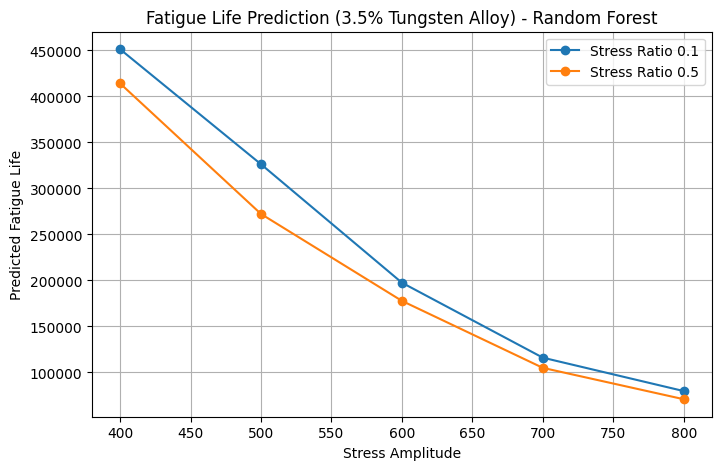

In [2]:
import numpy as np
import joblib
import pandas as pd
import matplotlib.pyplot as plt

# Load trained Random Forest model
rf_model = joblib.load("rf_model.pkl")

# Define input values
stress_amplitudes = np.array([400, 500, 600, 700, 800])
stress_ratios = np.array([0.1, 0.5])
tungsten_alloy = 3.5  # Fixed at 3.5%

# Prepare input data
input_data = np.array([[amp, ratio, tungsten_alloy] for amp in stress_amplitudes for ratio in stress_ratios])

# Predict fatigue life cycles
rf_preds = rf_model.predict(input_data)

# Convert predictions into a DataFrame
results_df = pd.DataFrame(input_data, columns=["Stress Amplitude", "Stress Ratio", "Tungsten Alloy"])
results_df["Predicted Fatigue Life"] = rf_preds

# Create plot
plt.figure(figsize=(8, 5))
for ratio in stress_ratios:
    subset = results_df[results_df["Stress Ratio"] == ratio]
    plt.plot(subset["Stress Amplitude"], subset["Predicted Fatigue Life"], marker='o', label=f"Stress Ratio {ratio}")

plt.xlabel("Stress Amplitude")
plt.ylabel("Predicted Fatigue Life")
plt.title("Fatigue Life Prediction (3.5% Tungsten Alloy) - Random Forest")
plt.legend()
plt.grid()

# Save figure as PNG
plt.savefig("fatigue_life_prediction_rf.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()